## Imports

In [1]:
from math import *
import numpy as np
import pandas as pd

#for plots
import matplotlib.pyplot as plt
import seaborn as sns

#to import files
import glob

#stats
from scipy.stats import kurtosis

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
path = r'C:/Users/varsh/OneDrive/Desktop/Honours/'
all_files = glob.glob(path + "/*.csv")

for filename in all_files:
    print(filename)

C:/Users/varsh/OneDrive/Desktop/Honours\dailydata.csv
C:/Users/varsh/OneDrive/Desktop/Honours\df.csv
C:/Users/varsh/OneDrive/Desktop/Honours\permutationDf.csv
C:/Users/varsh/OneDrive/Desktop/Honours\permutationDfAdjust.csv
C:/Users/varsh/OneDrive/Desktop/Honours\summerData.csv
C:/Users/varsh/OneDrive/Desktop/Honours\summerDataBank.csv
C:/Users/varsh/OneDrive/Desktop/Honours\summerDataParra.csv
C:/Users/varsh/OneDrive/Desktop/Honours\summerDataRich.csv
C:/Users/varsh/OneDrive/Desktop/Honours\summerDataSyd.csv
C:/Users/varsh/OneDrive/Desktop/Honours\sydneydf.csv
C:/Users/varsh/OneDrive/Desktop/Honours\test.csv


In [3]:
#import dfs
df = pd.read_csv("C:/Users/varsh/OneDrive/Desktop/Honours\df.csv", index_col=0, header=0).reset_index(drop = True)
summerData = pd.read_csv("C:/Users/varsh/OneDrive/Desktop/Honours\summerData.csv", index_col=0, header=0).reset_index(drop = True)
summerDataBank = pd.read_csv("C:/Users/varsh/OneDrive/Desktop/Honours\summerDataBank.csv", index_col=0, header=0).reset_index(drop = True)
summerDataRich = pd.read_csv("C:/Users/varsh/OneDrive/Desktop/Honours\summerDataRich.csv", index_col=0, header=0).reset_index(drop = True)
summerDataSyd = pd.read_csv("C:/Users/varsh/OneDrive/Desktop/Honours\summerDataSyd.csv", index_col=0, header=0).reset_index(drop = True)

##  Creating the Dataset

In [4]:
##### STEP ONE
#Break the data into two vectors for two time periods (equal length makes most sense). 
#E.g., the annual monthly, or annual multi-monthly, precipitation over the time periods 1967/68-1993/94 = x1,
#and over the period 1994/95-2020/21 = x2.

#here we create a new df, called permutationDf, that has all vectors we want to use in the testing
#I created the permutation Df using Excel as I couldnt get python to do exactly what I wanted without more effort


permutationDf = pd.read_csv("C:/Users/varsh/OneDrive/Desktop/Honours\permutationDf.csv", header=0)
permutationDf

,SydDec_1,SydDec_2,SydJan_1,SydJan_2,SydFeb_1,SydFeb_2,SydMar_1,SydMar_2,BanDec_1,BanDec_2,...,ParMar_1,ParMar_2,RicDec_1,RicDec_2,RicJan_1,RicJan_2,RicFeb_1,RicFeb_2,RicMar_1,RicMar_2
0,24.7,24.20,25.1,25.30,26.4,25.00,25.3,25.40,25.0,27.0,...,27.4,25.6,27.4,27.60,26.6,28.5,28.2,26.0,26.9,26.70
1,23.6,24.00,25.9,26.50,26.7,27.30,24.6,24.70,27.9,24.9,...,26.5,25.5,26.3,26.00,28.4,30.0,28.7,29.6,25.0,25.90
2,25.5,25.70,27.6,28.20,25.7,26.30,25.1,23.50,26.8,26.2,...,25.9,26.7,28.6,29.05,31.1,32.4,29.3,30.2,27.3,24.65
3,25.4,24.90,23.2,24.80,25.6,25.10,26.2,25.10,25.9,29.1,...,26.5,29.5,29.8,29.20,28.0,26.9,30.5,28.2,30.7,26.10
4,24.3,23.70,25.4,25.40,25.3,25.20,24.6,24.60,29.7,27.4,...,24.8,27.0,27.5,26.00,30.0,27.4,28.4,27.4,27.4,26.30
5,24.5,24.40,26.7,24.10,24.9,26.30,24.0,25.70,27.2,25.1,...,27.0,26.4,27.1,28.10,29.5,27.9,27.6,29.0,25.0,27.40
6,24.2,26.80,25.6,27.60,26.9,29.00,26.7,27.00,27.9,29.2,...,25.8,25.6,28.5,31.10,28.0,31.2,30.9,31.9,28.5,30.30
7,23.7,25.70,27.4,26.60,25.5,26.10,25.3,25.70,28.0,27.7,...,26.0,26.2,27.0,28.80,31.5,30.5,28.7,27.2,27.6,26.90
8,26.3,23.60,26.3,24.80,26.3,27.50,24.7,25.30,30.0,27.7,...,25.5,25.5,29.8,26.10,28.1,26.5,28.6,30.7,26.5,26.50
9,25.8,27.60,25.2,27.30,26.4,27.30,25.2,25.80,29.3,27.2,...,27.0,26.8,27.6,29.60,27.5,31.2,27.7,29.1,26.6,25.70


## Permutation Function

In [1]:
#### STEP TWO
# PERMUTATION FUNCTION   

def dbarFunc(x1,x2, func = "mean", q = 25):
    if func == "mean":
        dbar = np.mean(x1) - np.mean(x2)
    elif func == "variance":
        dbar = np.var(x1) - np.var(x2)
    elif func == "median":
        dbar = np.median(x1) - np.median(x2)
    elif func == "percentile":
        dbar = np.percentile(x1, q) - np.percentile(x2, q) 
    return dbar

# Loop (typically 5,000 times) to sample the entire time series WITHOUT replacement, 
# so that there are two vectors of samples (s1 and s2) of the original data that are the same size as vectors x1 and x2.

def resample_means(x1, x2, num = 5000, func = "mean", q = 25):
    #initialsise list for holding the resampled means z
    z = []
    #combine the samples into one list
    x1.dropna(inplace=True)
    x2.dropna(inplace = True)
    samples = x1.append(x2)
    samples.dropna(inplace=True) #in the instance x1 and x2 are inequal but the dataset 
    x1Len = np.count_nonzero(~np.isnan(x1)) #len without NaN

    #calculate dbar, the mean difference over the two periods, mean(x2) - mean(x1)
    dbar = dbarFunc(x1, x2, func = func, q = q)
    #iterate num times to sample the entire seriess WITHOUT replacement and take the dbar of these value and store in z
    for n in range(int(num)):
        resample = np.random.choice(samples, len(samples), replace = False)
        sample1 = resample[:x1Len]
        sample2 = resample[x1Len:]
        #Take the differences in mean between these resamples and store in z
        dbardash = dbarFunc(sample1, sample2, func=func, q =q)
        z.append(dbardash)
    
    return dbar, z

In [6]:
#### STEP THREE

# the p-value (for significance) can be calculated by taking the average of all resamples exceeding 
# the observed mean (both the absolute value of the observed mean and the negative absolute value). 
# i.e. p-value = (sum(z >= abs(dbar)) + sum(z <= -abs(dbar)))/n where n is the number of resamples.

def p_value(x1, x2, num = 5000, func = 'mean',q = 25):
    
    dbar, z = resample_means(x1, x2, num, func = func, q = q)
    
    values = sum([1 for i in z if i >= abs(dbar) or i <= - abs(dbar)])
    p = values/num
    return dbar, z, p
# Permutation Testing - Difference in Means for All Years

# Permutation Testing - Difference in Means for All Years

In [7]:
## list that contains the subplots titles

header = []
locations = ["Sydney", "Bankstown", "Parramatta", "Richmond"]
month = ["Dec", "Jan", "Feb", "Mar"]

for i in locations:
    for j in month:
        header.append(i + ' - '+ j)
        
#dataframe that contains the p-values 
pValues = pd.DataFrame(columns = ['month', 'p-value - All Years'])
pValues['month'] = header

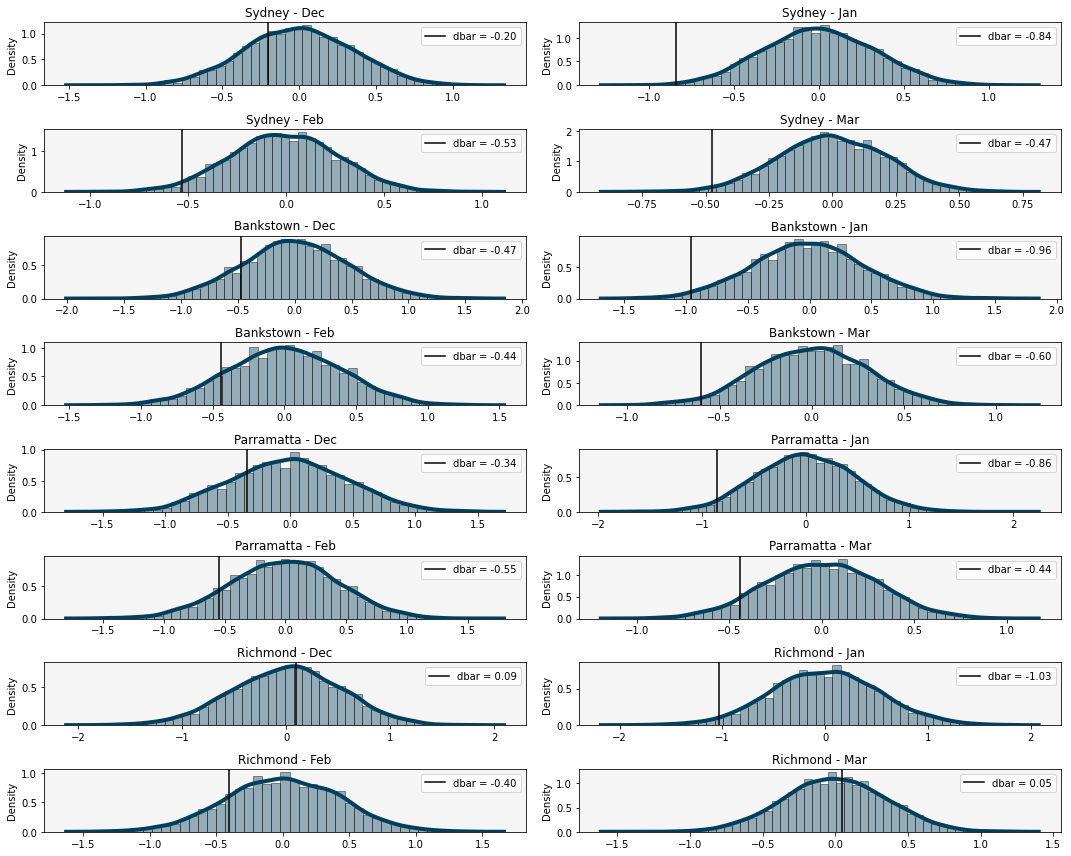

In [8]:
x1s = permutationDf.columns[0::2] #extracts the columns from period 1967-1994 and stores in variables x1s
x2s = permutationDf.columns[1::2] #extracts the columns from period 1995-2021 and stores in variables x2s

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 12))

pValue = []

for ax, x1, x2, title in zip(axes.ravel(), x1s,x2s, header):
    #run the p_value function 
    dbar, z, p = p_value(permutationDf[x1], permutationDf[x2], func = 'mean')
    #append the p value to list 
    pValue.append(p)
    
    #density plots
    sns.distplot(z, hist=True, kde=True, #normed historgram with gaussian kernel density estimate
             color = '#003f5c',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax = ax)
    #title taken from header list
    ax.set_title(title)
    
    #line for dbar
    ax.axvline(x=dbar, color = 'black', label = 'dbar = {:.2f}'.format(dbar))
    ax.legend()
    
    ax.set_facecolor('#f5f5f5')
    
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.05, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)

fig.tight_layout()
plt.show()

pValues['p-value - All Years'] = pValue

# Permutation Testing - Difference in Means (up to Summer 2020)

In [9]:
permutationDfAdjust = pd.read_csv("C:/Users/varsh/OneDrive/Desktop/Honours\permutationDfAdjust.csv", header=0)

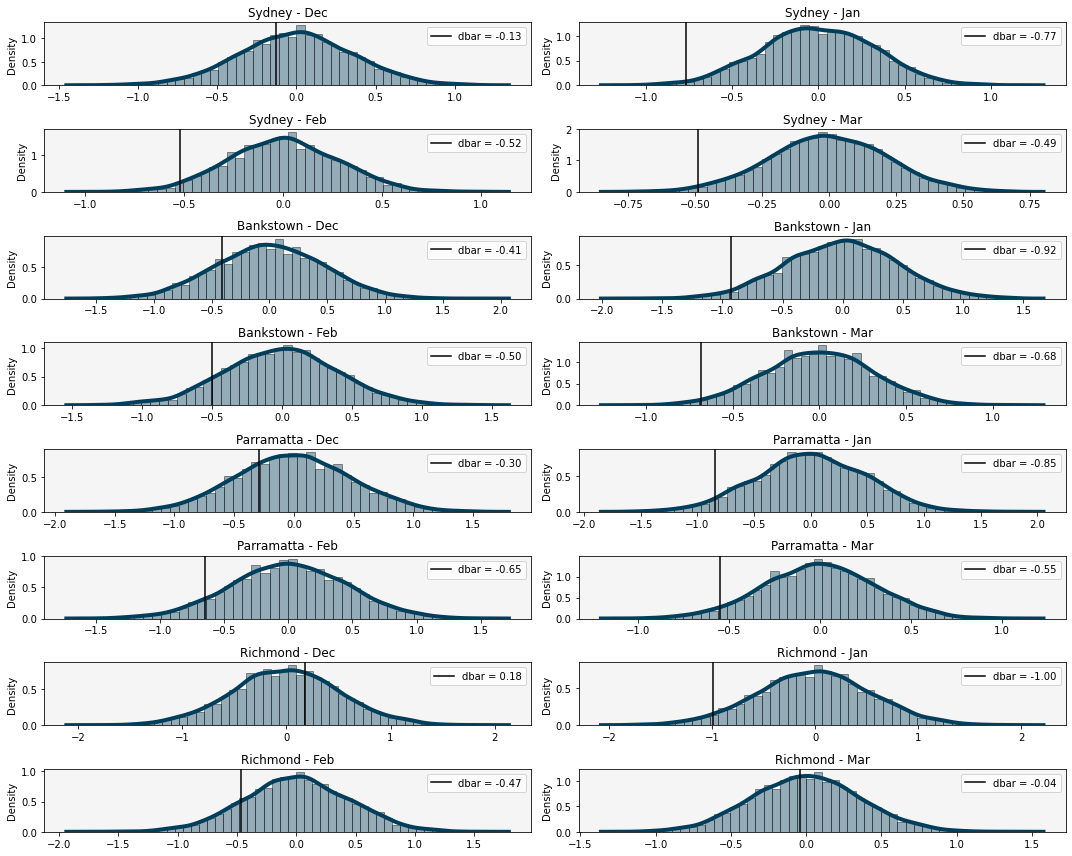

In [10]:
x1s = permutationDfAdjust.columns[0::2] #extracts the columns from period 1967-1994 and stores in variables x1s
x2s = permutationDfAdjust.columns[1::2] #extracts the columns from period 1995-2020 and stores in variables x2s

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 12))

pValue2 = []

for ax, x1, x2, title in zip(axes.ravel(), x1s,x2s, header):
    #run the p_value function 
    dbar, z, p = p_value(permutationDfAdjust[x1], permutationDfAdjust[x2])
    #append the p value to list 
    pValue2.append(p)
    
    #density plots
    sns.distplot(z, hist=True, kde=True, #normed historgram with gaussian kernel density estimate
             color = '#003f5c',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax = ax)
    #title taken from header list
    ax.set_title(title)
    
    #line for dbar
    ax.axvline(x=dbar, color = 'black', label = 'dbar = {:.2f}'.format(dbar))
    ax.legend()
    
    ax.set_facecolor('#f5f5f5')
    
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.05, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
fig.tight_layout()
plt.show()

pValues['p-value - (up to summer 2020)'] = pValue2

# Permutation Testing - Difference in Variance

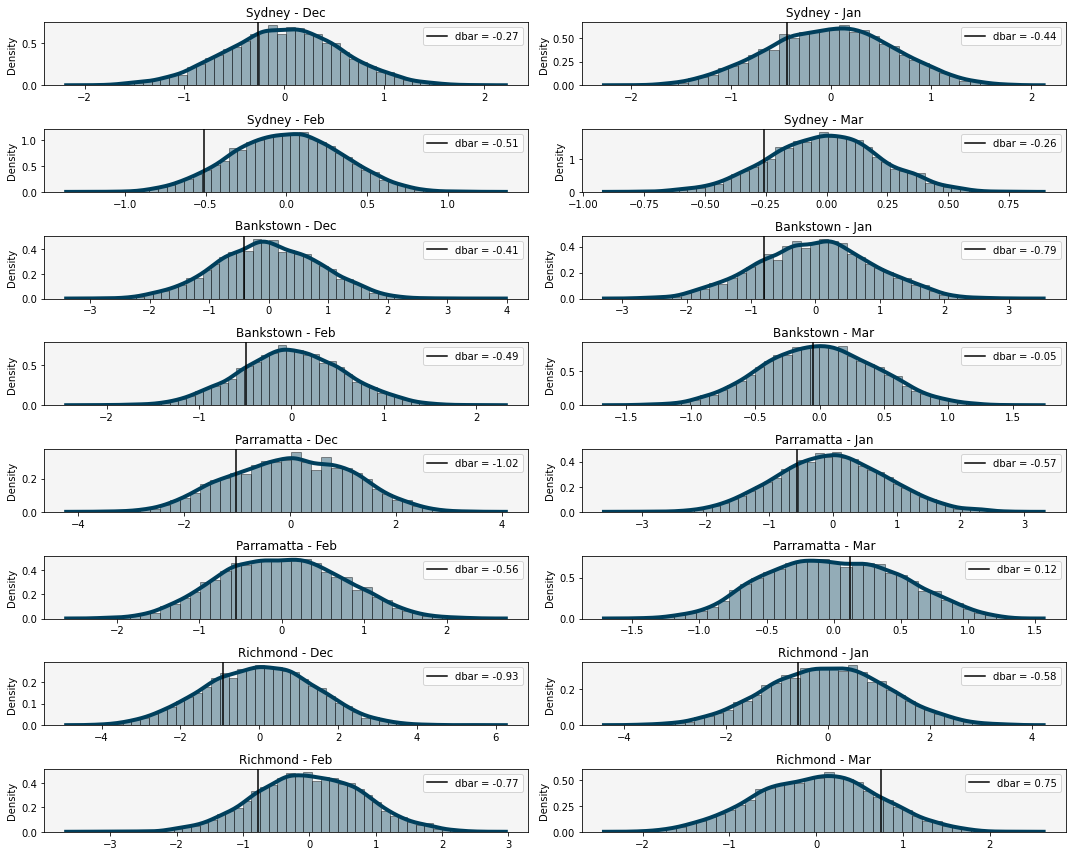

In [11]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 12))

pValue3 = []

for ax, x1, x2, title in zip(axes.ravel(), x1s,x2s, header):
    #run the p_value function 
    dbar, z, p = p_value(permutationDf[x1], permutationDf[x2], func = "variance")
    #append the p value to list 
    pValue3.append(p)
    
    #density plots
    sns.distplot(z, hist=True, kde=True, #normed historgram with gaussian kernel density estimate
             color = '#003f5c',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax = ax)
    #title taken from header list
    ax.set_title(title)
    
    #line for dbar
    ax.axvline(x=dbar, color = 'black', label = 'dbar = {:.2f}'.format(dbar))
    ax.legend()
    
    ax.set_facecolor('#f5f5f5')
    
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.05, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
fig.tight_layout()
plt.show()

pValues['p-value - Variance'] = pValue3

# Permutation Testing - Difference in 25th Percentile

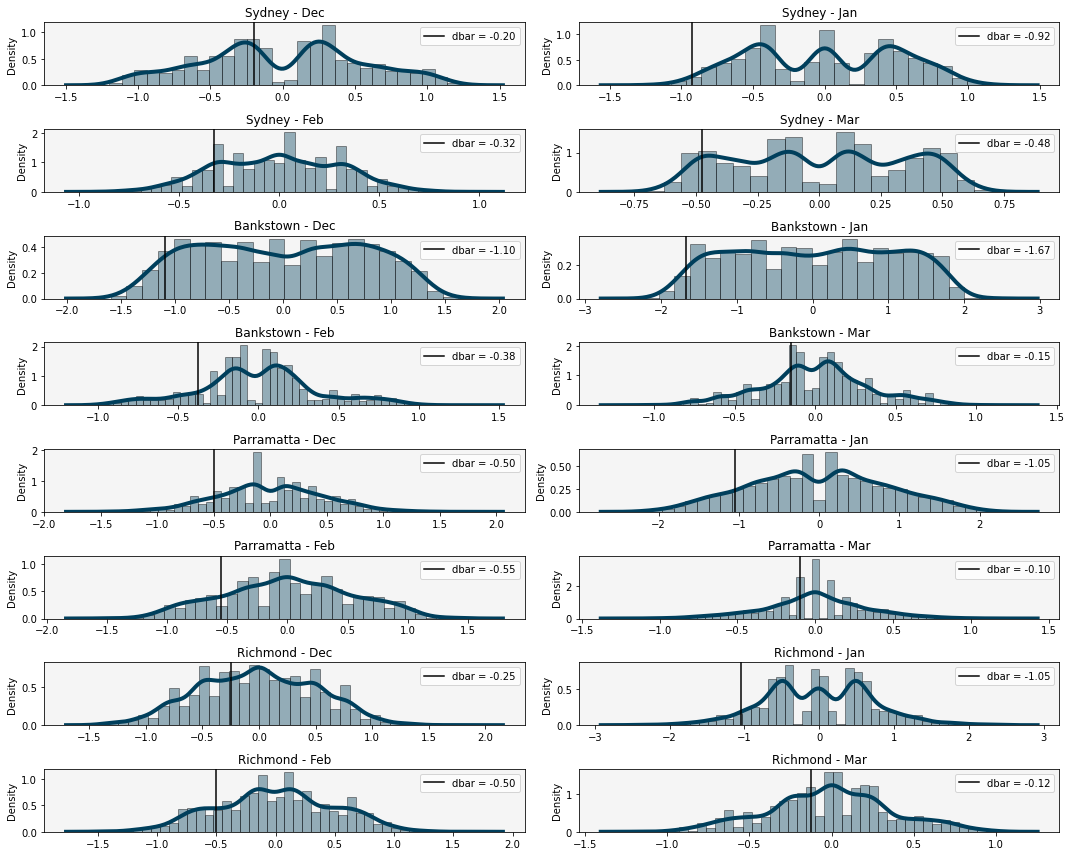

In [12]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 12))

pValue6 = []

for ax, x1, x2, title in zip(axes.ravel(), x1s,x2s, header):
    #run the p_value function 
    dbar, z, p = p_value(permutationDf[x1], permutationDf[x2], func = "percentile", q = 25)
    #append the p value to list 
    pValue6.append(p)
    
    #density plots
    sns.distplot(z, hist=True, kde=True, #normed historgram with gaussian kernel density estimate
             color = '#003f5c',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax = ax)
    #title taken from header list
    ax.set_title(title)
    
    #line for dbar
    ax.axvline(x=dbar, color = 'black', label = 'dbar = {:.2f}'.format(dbar))
    ax.legend()
    
    ax.set_facecolor('#f5f5f5')
    
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.05, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
fig.tight_layout()
plt.show()

pValues['p-value - 25th percentile'] = pValue6

# Permutation Testing - Difference in 90th Percentile

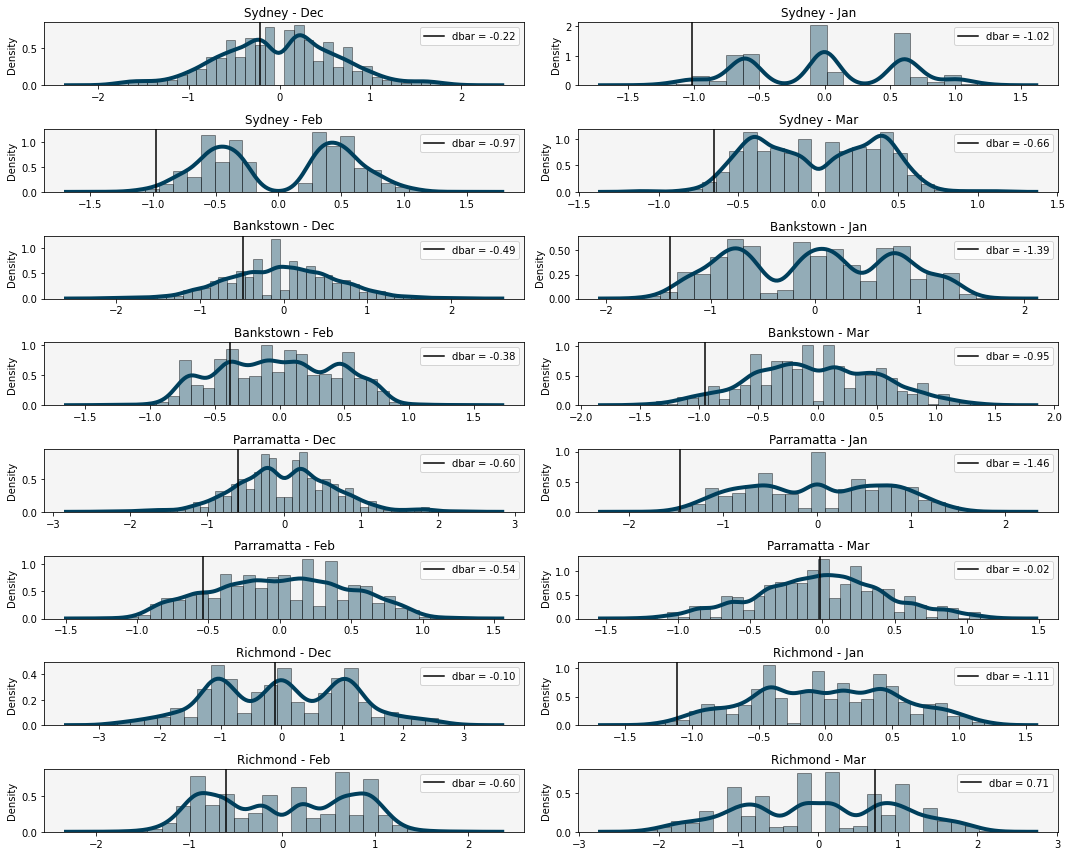

In [13]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 12))

pValue7 = []

for ax, x1, x2, title in zip(axes.ravel(), x1s,x2s, header):
    #run the p_value function 
    dbar, z, p = p_value(permutationDf[x1], permutationDf[x2], func = "percentile", q = 90)
    #append the p value to list 
    pValue7.append(p)
    
    #density plots
    sns.distplot(z, hist=True, kde=True, #normed historgram with gaussian kernel density estimate
             color = '#003f5c',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax = ax)
    #title taken from header list
    ax.set_title(title)
    
    #line for dbar
    ax.axvline(x=dbar, color = 'black', label = 'dbar = {:.2f}'.format(dbar))
    ax.legend()
    
    ax.set_facecolor('#f5f5f5')
    
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.05, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
fig.tight_layout()
plt.show()

pValues['p-value - 90th percentile'] = pValue7

# Permutation Testing - Difference in Medians

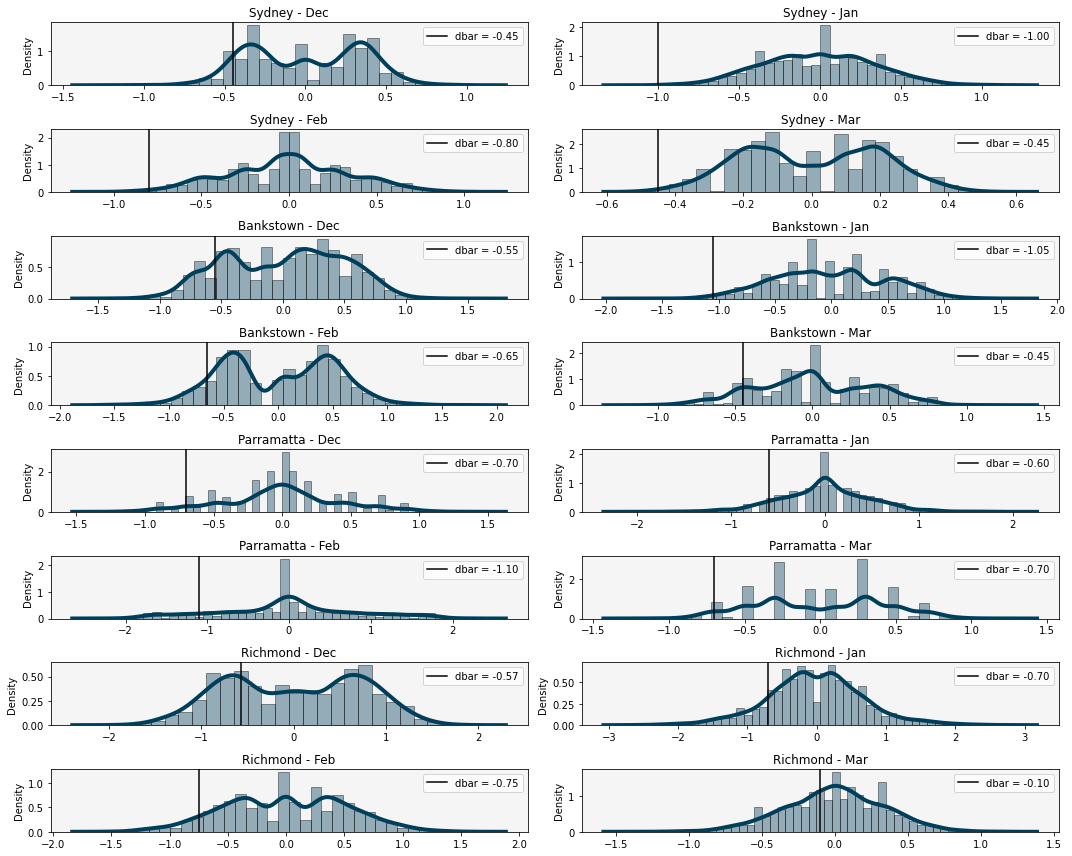

In [14]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 12))

pValue4 = []

for ax, x1, x2, title in zip(axes.ravel(), x1s,x2s, header):
    #run the p_value function 
    dbar, z, p = p_value(permutationDf[x1], permutationDf[x2], func = "median")
    #append the p value to list 
    pValue4.append(p)
    
    #density plots
    sns.distplot(z, hist=True, kde=True, #normed historgram with gaussian kernel density estimate
             color = '#003f5c',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax = ax)
    #title taken from header list
    ax.set_title(title)
    
    #line for dbar
    ax.axvline(x=dbar, color = 'black', label = 'dbar = {:.2f}'.format(dbar))
    ax.legend()
    
    ax.set_facecolor('#f5f5f5')
    
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.05, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
fig.tight_layout()
plt.show()

pValues['p-value - Median'] = pValue4

## P - Values

In [15]:
pValues

,month,p-value - All Years,p-value - (up to summer 2020),p-value - Variance,p-value - 25th percentile,p-value - 90th percentile,p-value - Median
0,Sydney - Dec,0.5674,0.7108,0.6450,0.8470,0.7654,0.2254
1,Sydney - Jan,0.0066,0.0174,0.4996,0.0340,0.0316,0.0024
2,Sydney - Feb,0.0490,0.0602,0.1322,0.3262,0.0300,0.0138
3,Sydney - Mar,0.0250,0.0254,0.2646,0.1962,0.0406,0.0112
4,Bankstown - Dec,0.3094,0.3868,0.6436,0.1522,0.4712,0.2928
5,Bankstown - Jan,0.0272,0.0458,0.3828,0.0764,0.0178,0.0214
6,Bankstown - Feb,0.2740,0.2174,0.3888,0.2796,0.5210,0.2092
7,Bankstown - Mar,0.0444,0.0270,0.9178,0.6122,0.0820,0.3090
8,Parramatta - Dec,0.4748,0.5448,0.4088,0.3154,0.3138,0.1676
9,Parramatta - Jan,0.0668,0.0766,0.5148,0.2492,0.0124,0.2446


## P - Values - Summer Period

In [16]:
 permutationDfSummer = pd.DataFrame()

In [17]:
permutationDfSummer["Syd1"] = pd.melt(permutationDf.iloc[:,:8:2])["value"]
permutationDfSummer["Syd2"] = pd.melt(permutationDf.iloc[:,1:9:2])["value"]

permutationDfSummer["Ban1"] = pd.melt(permutationDf.iloc[:,8:16:2])["value"]
permutationDfSummer["Ban2"] = pd.melt(permutationDf.iloc[:,9:16:2])["value"]

permutationDfSummer["Par1"] = pd.melt(permutationDf.iloc[:,16:24:2])["value"]
permutationDfSummer["Par2"] = pd.melt(permutationDf.iloc[:,17:24:2])["value"]

permutationDfSummer["Ric1"] = pd.melt(permutationDf.iloc[:,24:32:2])["value"]
permutationDfSummer["Ric2"] = pd.melt(permutationDf.iloc[:,25:32:2])["value"]

In [18]:
## list that contains the titles
header = ["Sydney", "Bankstown", "Parramatta", "Richmond"]

pValuesSummer = pd.DataFrame()
pValuesSummer['location'] = header

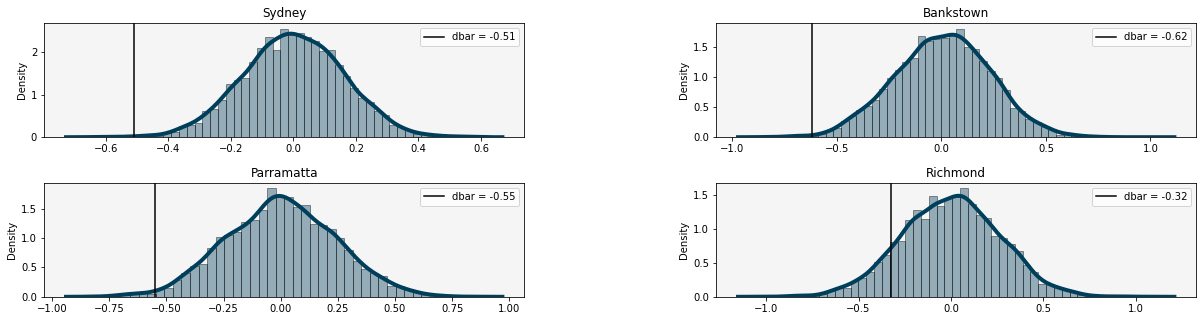

In [19]:
x1s = permutationDfSummer.columns[::2] #extracts the columns from period 1967-1994 and stores in variables x1s
x2s = permutationDfSummer.columns[1::2] #extracts the columns from period 1995-2021 and stores in variables x2s

pValueSummerMean = []
pValueSummerMedian = []
pValueSummerVariance = []
pValueSummer25 = []

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 4))

for ax, x1, x2, title in zip(axes.ravel(), x1s,x2s, header):
    #mean testing 
    dbar, z, pMean = p_value(permutationDfSummer[x1], permutationDfSummer[x2])
    pValueSummerMean.append(pMean)
    sns.distplot(z, hist=True, kde=True, #normed historgram with gaussian kernel density estimate
             color = '#003f5c',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax = ax)
    #title taken from header list
    ax.set_title(title)
    
    #line for dbar
    ax.axvline(x=dbar, color = 'black', label = 'dbar = {:.2f}'.format(dbar))
    ax.legend(loc='upper right')
    ax.set_facecolor('#f5f5f5')

    
    # set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.05, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()
pValuesSummer['mean'] = pValueSummerMean


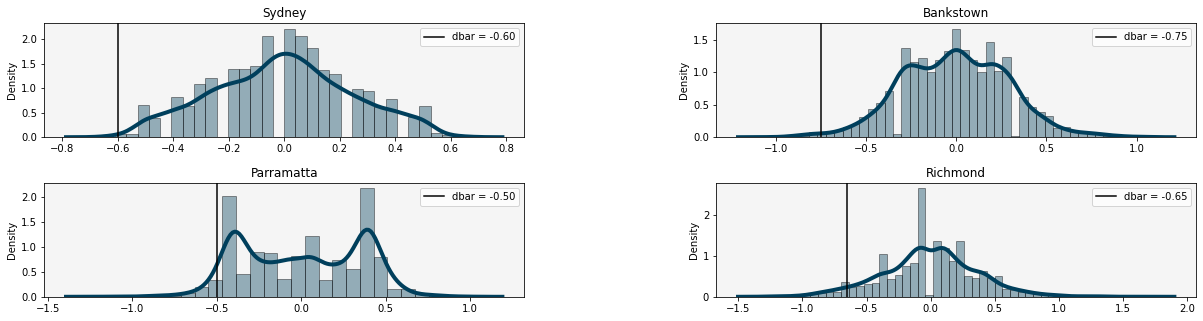

In [20]:
x1s = permutationDfSummer.columns[::2] #extracts the columns from period 1967-1994 and stores in variables x1s
x2s = permutationDfSummer.columns[1::2] #extracts the columns from period 1995-2021 and stores in variables x2s


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 4))

for ax, x1, x2, title in zip(axes.ravel(), x1s,x2s, header):
    #mean testing 
    dbar, z, pMedian = p_value(permutationDfSummer[x1], permutationDfSummer[x2], func = 'median')
    pValueSummerMedian.append(pMedian)
    sns.distplot(z, hist=True, kde=True, #normed historgram with gaussian kernel density estimate
             color = '#003f5c',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax = ax)
    #title taken from header list
    ax.set_title(title)
    
    #line for dbar
    ax.axvline(x=dbar, color = 'black', label = 'dbar = {:.2f}'.format(dbar))
    ax.legend(loc='upper right')
    ax.set_facecolor('#f5f5f5')

    
    # set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.05, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()
pValuesSummer['median'] = pValueSummerMedian


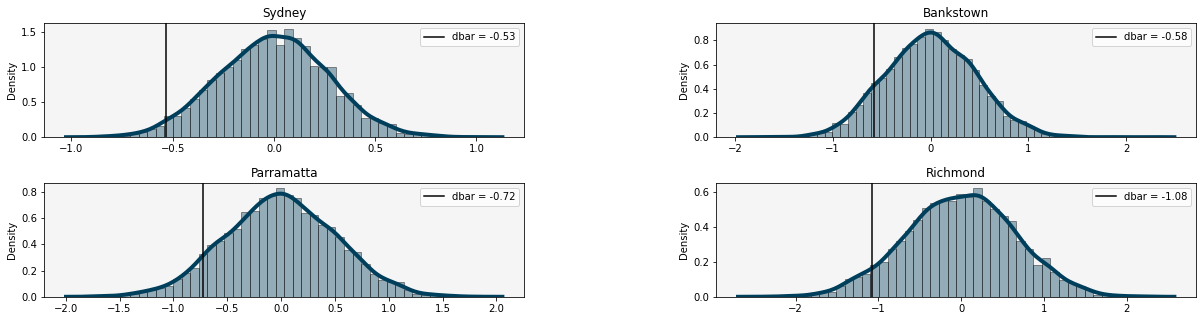

In [21]:
x1s = permutationDfSummer.columns[::2] #extracts the columns from period 1967-1994 and stores in variables x1s
x2s = permutationDfSummer.columns[1::2] #extracts the columns from period 1995-2021 and stores in variables x2s


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 4))

for ax, x1, x2, title in zip(axes.ravel(), x1s,x2s, header):
    #mean testing 
    dbar, z, pVariance = p_value(permutationDfSummer[x1], permutationDfSummer[x2], func = 'variance')
    pValueSummerVariance.append(pVariance)
    sns.distplot(z, hist=True, kde=True, #normed historgram with gaussian kernel density estimate
             color = '#003f5c',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax = ax)
    #title taken from header list
    ax.set_title(title)
    
    #line for dbar
    ax.axvline(x=dbar, color = 'black', label = 'dbar = {:.2f}'.format(dbar))
    ax.legend(loc='upper right')
    ax.set_facecolor('#f5f5f5')

    
    # set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.05, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()
pValuesSummer['variance'] = pValueSummerVariance


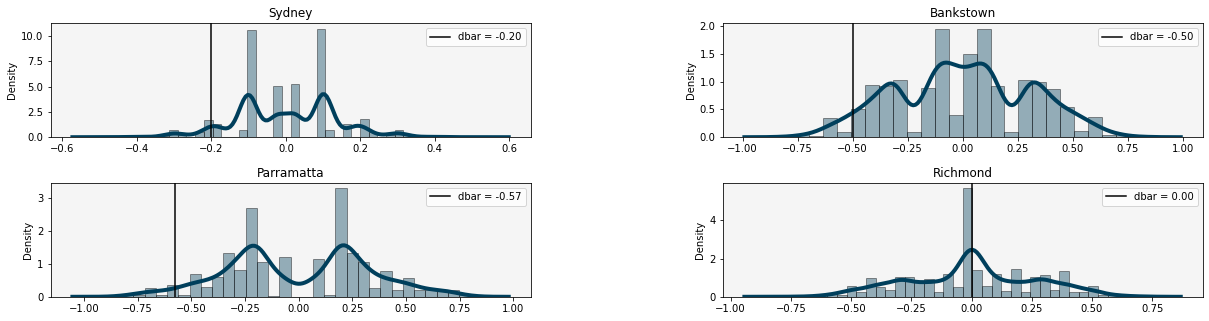

In [22]:
x1s = permutationDfSummer.columns[::2] #extracts the columns from period 1967-1994 and stores in variables x1s
x2s = permutationDfSummer.columns[1::2] #extracts the columns from period 1995-2021 and stores in variables x2s


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 4))

for ax, x1, x2, title in zip(axes.ravel(), x1s,x2s, header):
    #mean testing 
    dbar, z, p25 = p_value(permutationDfSummer[x1], permutationDfSummer[x2], func = 'percentile', q=25)
    pValueSummer25.append(p25)
    sns.distplot(z, hist=True, kde=True, #normed historgram with gaussian kernel density estimate
             color = '#003f5c',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax = ax)
    #title taken from header list
    ax.set_title(title)
    
    #line for dbar
    ax.axvline(x=dbar, color = 'black', label = 'dbar = {:.2f}'.format(dbar))
    ax.legend(loc='upper right')
    ax.set_facecolor('#f5f5f5')

    
    # set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.05, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()
pValuesSummer['25th percentile'] = pValueSummer25


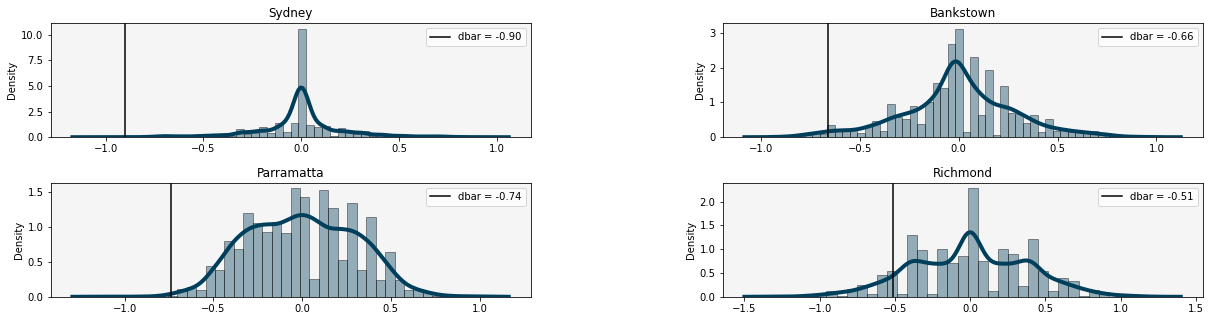

In [23]:
x1s = permutationDfSummer.columns[::2] #extracts the columns from period 1967-1994 and stores in variables x1s
x2s = permutationDfSummer.columns[1::2] #extracts the columns from period 1995-2021 and stores in variables x2s


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 4))

pValueSummer95 = []
for ax, x1, x2, title in zip(axes.ravel(), x1s,x2s, header):
    #mean testing 
    dbar, z, p95 = p_value(permutationDfSummer[x1], permutationDfSummer[x2], func = 'percentile', q=90)
    pValueSummer95.append(p95)
    sns.distplot(z, hist=True, kde=True, #normed historgram with gaussian kernel density estimate
             color = '#003f5c',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax = ax)
    #title taken from header list
    ax.set_title(title)
    
    #line for dbar
    ax.axvline(x=dbar, color = 'black', label = 'dbar = {:.2f}'.format(dbar))
    ax.legend(loc='upper right')
    ax.set_facecolor('#f5f5f5')

    
    # set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.05, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()
pValuesSummer['90th percentile'] = pValueSummer95


In [24]:
pValuesSummer

,location,mean,median,variance,25th percentile,90th percentile
0,Sydney,0.0026,0.0054,0.0466,0.1686,0.0008
1,Bankstown,0.0060,0.0178,0.2152,0.1280,0.0356
2,Parramatta,0.0194,0.1218,0.1574,0.0860,0.0058
3,Richmond,0.2272,0.0870,0.1040,1.0000,0.1732
